# IBM Capstone Project: Cluster and analyze Amsterdam Neighbourhoods

By Pierre Borst

## Data

#### Import Amsterdam data and postal_codes coordinates

In [1]:
import pandas as pd
import numpy as np
import csv
low_memory=False

amsterdam_data_csv = pd.read_csv('https://api.data.amsterdam.nl/dcatd/datasets/G5JpqNbhweXZSw/purls/LXGOPUQQfAXBbg', sep=';')
nbh_coor_df = pd.read_csv('https://github.com/bobdenotter/4pp/raw/master/4pp.csv')
nbh_coor_df['postcode'] = nbh_coor_df['postcode'].astype('str')
nbh_coor_df.rename(columns={'postcode':'postal_code'}, inplace = True)
nbh_coor_df.drop(columns=['id', 'woonplaats', 'alternatieve_schrijfwijzen', 'gemeente', 'provincie', 'netnummer', 'soort'], inplace = True)

/Users/digitaldecisions/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Set lists for neighbourhoud and neighbourhoud_codes

In [2]:
nbh = ["Kop Zeedijk" , "Oude Kerk e.o." , "Burgwallen Oost" , "Nes e.o." , "BG-terrein e.o." , "Stationsplein e.o." , "Hemelrijk" , "Nieuwendijk Noord" , "Spuistraat Noord" , "Nieuwe Kerk e.o." , "Spuistraat Zuid" , "Begijnhofbuurt" , "Kalverdriehoek" , "Langestraat e.o." , "Leliegracht e.o." , "Felix Meritisbuurt" , "Leidsegracht Noord" , "Spiegelbuurt" , "Gouden Bocht" , "Van Loonbuurt" , "Amstelveldbuurt" , "Rembrandtpleinbuurt" , "Reguliersbuurt" , "Leidsegracht Zuid" , "Oosterdokseiland" , "Scheepvaarthuisbuurt" , "Rapenburg" , "Lastage" , "Nieuwmarkt" , "Uilenburg" , "Valkenburg" , "Zuiderkerkbuurt" , "Waterloopleinbuurt" , "Westerdokseiland" , "Haarlemmerbuurt Oost" , "Haarlemmerbuurt West" , "Westelijke Eilanden" , "Planciusbuurt Noord" , "Planciusbuurt Zuid" , "Driehoekbuurt" , "Bloemgrachtbuurt" , "Marnixbuurt Noord" , "Zaagpoortbuurt" , "Marnixbuurt Midden" , "Elandsgrachtbuurt" , "Passeerdersgrachtbuurt" , "Groenmarktkadebuurt" , "Marnixbuurt Zuid" , "Anjeliersbuurt Noord" , "Anjeliersbuurt Zuid" , "Leidsebuurt Noordwest" , "Leidsebuurt Zuidwest" , "Leidsebuurt Noordoost" , "Leidsebuurt Zuidoost" , "Weteringbuurt" , "Den Texbuurt" , "Utrechtsebuurt Zuid" , "Frederikspleinbuurt" , "Weesperbuurt" , "Sarphatistrook" , "de Plantage" , "Alexanderplein e.o." , "Marine-Etablissement" , "Kattenburg" , "Wittenburg" , "Oostenburg" , "Czaar Peterbuurt" , "Het Funen" , "Kazernebuurt" , "Kadijken" , "Coenhaven/Mercuriushaven" , "Alfa-driehoek" , "Petroleumhaven" , "Westhaven Noord" , "Vervoerscentrum" , "Amerikahaven" , "Afrikahaven" , "Westhaven Zuid" , "Houthavens West" , "Houthavens Oost" , "Zeeheldenbuurt" , "Spaarndammerbuurt Noordoost" , "Spaarndammerbuurt Zuidoost" , "Spaarndammerbuurt Zuidwest" , "Spaarndammerbuurt Midden" , "Spaarndammerbuurt Noordwest" , "Westergasfabriek" , "Overbraker Binnenpolder" , "De Wittenbuurt Noord" , "De Wittenbuurt Zuid" , "Staatsliedenbuurt Noordoost" , "Fannius Scholtenbuurt" , "Westerstaatsman" , "Buyskade e.o." , "Ecowijk" , "Markthallen" , "Bedrijvencentrum Westerkwartier" , "Marcanti" , "Frederik Hendrikbuurt Noord" , "Frederik Hendrikbuurt Zuidoost" , "Frederik Hendrikbuurt Zuidwest" , "Da Costabuurt Noord" , "Bellamybuurt Noord" , "Bellamybuurt Zuid" , "Da Costabuurt Zuid" , "Borgerbuurt" , "Lootsbuurt" , "Helmersbuurt Oost" , "WG-terrein" , "Cremerbuurt Oost" , "Cremerbuurt West" , "Vondelparkbuurt West" , "Vondelparkbuurt Oost" , "Vondelparkbuurt Midden" , "Woon- en groengebied Sloterdijk" , "Bedrijventerrein Sloterdijk I" , "Bedrijventerrein Landlust" , "Bosleeuw" , "Landlust Zuid" , "Erasmusparkbuurt Oost" , "Gibraltarbuurt" , "Landlust Noord" , "Erasmusparkbuurt West" , "Robert Scottbuurt Oost" , "Robert Scottbuurt West" , "Laan van Spartaan" , "Kolenkitbuurt Zuid" , "Kolenkitbuurt Noord" , "Geuzenhofbuurt" , "Trompbuurt" , "Pieter van der Doesbuurt" , "John Franklinbuurt" , "Jan Maijenbuurt" , "Orteliusbuurt Noord" , "Mercatorpark" , "Balboaplein e.o." , "Columbusplein e.o." , "Orteliusbuurt Midden" , "Orteliusbuurt Zuid" , "Paramariboplein e.o." , "Postjeskade e.o." , "Kortenaerkwartier" , "Filips van Almondekwartier" , "De Wester Quartier" , "Van Brakelkwartier" , "Sloterdijk II" , "Sloterdijk III Oost" , "Sloterdijk III West" , "De Heining" , "Teleport" , "Bretten Oost" , "Bretten West" , "Buurt 3" , "Buurt 2" , "Slotermeer Zuid" , "Noordoever Sloterplas" , "Buurt 4 Oost" , "Buurt 5  Noord" , "Sloterpark" , "Buurt 5 Zuid" , "Buurt 6" , "Buurt 7" , "Buurt 8" , "Buurt 9" , "Eendrachtspark" , "Osdorper Binnenpolder" , "Buurt 10" , "Ookmeer" , "Osdorper Bovenpolder" , "Bedrijvenpark Lutkemeer" , "Wildeman" , "Meer en Oever" , "Osdorpplein e.o." , "Calandlaan/Lelylaan" , "Osdorp Zuidoost" , "Osdorp Midden Noord" , "Osdorp Midden Zuid" , "Zuidwestkwadrant Osdorp Noord" , "Zuidwestkwadrant Osdorp Zuid" , "De Punt" , "Bedrijvencentrum Osdorp" , "Middelveldsche Akerpolder" , "De Aker West" , "De Aker Oost" , "Oostoever Sloterplas" , "Emanuel van Meterenbuurt" , "Jacob Geelbuurt" , "Overtoomse Veld Noord" , "Overtoomse Veld Zuid" , "Rembrandtpark Noord" , "Rembrandtpark Zuid" , "Johan Jongkindbuurt" , "Lucas/Andreasziekenhuis e.o." , "Koningin Wilhelminaplein" , "Andreasterrein" , "Delflandpleinbuurt Oost" , "Delflandpleinbuurt West" , "Riekerhaven" , "Schipluidenbuurt" , "Riekerpolder" , "Park Haagseweg" , "Nieuwe Meer" , "Sloterweg e.o." , "Nieuw Sloten Noordwest" , "Nieuw Sloten Noordoost" , "BelgiÃ¯Â¿Â½plein e.o." , "Nieuw Sloten Zuidwest" , "Nieuw Sloten Zuidoost" , "Dorp Sloten" , "Louis Chrispijnbuurt" , "Jacques Veldmanbuurt" , "Staalmanbuurt" , "Medisch Centrum Slotervaart" , "Zuidas Noord" , "RAI" , "VU-kwartier" , "Zuidas Zuid" , "Vivaldi" , "Hemonybuurt" , "Gerard Doubuurt" , "Frans Halsbuurt" , "Hercules Seghersbuurt" , "Sarphatiparkbuurt" , "Willibrordusbuurt" , "Van der Helstpleinbuurt" , "Lizzy Ansinghbuurt" , "Cornelis Troostbuurt" , "Diamantbuurt" , "Burgemeester Tellegenbuurt Oost" , "Burgemeester Tellegenbuurt West" , "Surinamepleinbuurt" , "Westlandgrachtbuurt" , "Aalsmeerwegbuurt West" , "Aalsmeerwegbuurt Oost" , "Legmeerpleinbuurt" , "Bedrijventerrein Schinkel" , "Schinkelbuurt Noord" , "Schinkelbuurt Zuid" , "Valeriusbuurt Oost" , "Valeriusbuurt West" , "Willemsparkbuurt Noord" , "Vondelpark West" , "Johannnes Vermeerbuurt" , "P.C. Hooftbuurt" , "Concertgebouwbuurt" , "Cornelis Schuytbuurt" , "Banpleinbuurt" , "Hondecoeterbuurt" , "Harmoniehofbuurt" , "Museumplein" , "Vondelpark Oost" , "Duivelseiland" , "Bertelmanpleinbuurt" , "Marathonbuurt Oost" , "Marathonbuurt West" , "Olympisch Stadion e.o." , "IJsbaanpad e.o." , "Van Tuyllbuurt" , "Diepenbrockbuurt" , "Beethovenbuurt" , "Hiltonbuurt" , "Minervabuurt Noord" , "Minervabuurt Midden" , "Minervabuurt Zuid" , "Wielingenbuurt" , "Scheldebuurt West" , "Scheldebuurt Midden" , "Scheldebuurt Oost" , "Veluwebuurt" , "Kop Zuidas" , "IJselbuurt West" , "IJselbuurt Oost" , "Kromme Mijdrechtbuurt" , "Rijnbuurt Oost" , "Rijnbuurt Midden" , "Rijnbuurt West" , "Zorgvlied" , "Prinses Irenebuurt" , "Beatrixpark" , "Gelderlandpleinbuurt" , "Buitenveldert Midden Zuid" , "Buitenveldert Zuidwest" , "Amsterdamse Bos" , "Buitenveldert West Midden" , "Zuiderhof" , "De Klenckebuurt" , "Buitenveldert Oost Midden" , "Buitenveldert Zuidoost" , "Amstelpark" , "Swammerdambuurt" , "Weesperzijde Midden/Zuid" , "Parooldriehoek" , "Oosterparkbuurt Noordwest" , "Oosterpark" , "Oosterparkbuurt Zuidoost" , "Oosterparkbuurt Zuidwest" , "Dapperbuurt Noord" , "Dapperbuurt Zuid" , "Oostpoort" , "Transvaalbuurt West" , "Transvaalbuurt Oost" , "Noordwestkwadrant Indische Buurt Noord" , "Noordwestkwadrant Indische Buurt Zuid" , "Zuidwestkwadrant Indische Buurt" , "Noordoostkwadrant Indische Buurt" , "Zuidoostkwadrant Indische Buurt" , "Zeeburgerdijk Oost" , "Flevopark" , "Oostelijke Handelskade" , "Rietlanden" , "Java-eiland" , "KNSM-eiland" , "Sporenburg" , "Borneo" , "Entrepot-Noordwest" , "Architectenbuurt" , "Bedrijvengebied Veelaan" , "Bedrijvengebied Cruquiusweg" , "Bedrijvengebied Zeeburgerkade" , "Zeeburgereiland Noordwest" , "Zeeburgereiland Zuidoost" , "Zeeburgereiland Zuidwest" , "Nieuwe Diep/Diemerpark" , "RI Oost terrein" , "Zeeburgereiland Noordoost" , "Steigereiland Noord" , "Steigereiland Zuid" , "Haveneiland Zuidwest/Rieteiland West" , "Haveneiland Noordwest" , "Haveneiland Noordoost" , "Strandeiland" , "Middeneiland Zuidoost" , "Middeneiland Noordoost" , "Middeneiland Zuidwest" , "Middeneiland Noordwest" , "Buiteneiland" , "Centrumeiland" , "Rieteiland Oost" , "Haveneiland Oost" , "Haveneiland Noord" , "De Eenhoorn" , "Julianapark" , "Don Bosco" , "Frankendael" , "Tuindorp Amstelstation" , "De Wetbuurt" , "Tuindorp Frankendael" , "Van der Kunbuurt" , "Linnaeusparkbuurt" , "Middenmeer Noord" , "Middenmeer Zuid" , "Sportpark Middenmeer Zuid" , "Sportpark Middenmeer Noord" , "Park De Meer" , "Sportpark Voorland" , "Science Park Noord" , "Science Park Zuid" , "Betondorp" , "Nieuwe Oosterbegraafplaats" , "Drieburg" , "Weespertrekvaart" , "Amstelglorie" , "Overamstel" , "Amstelkwartier Noord" , "De Omval" , "Amstelkwartier Zuid" , "Amstelkwartier West" , "Van der Pekbuurt" , "Bloemenbuurt Zuid" , "Bloemenbuurt Noord" , "IJplein e.o." , "Vogelbuurt Zuid" , "Vogelbuurt Noord" , "Vliegenbos" , "Tuindorp Nieuwendam West" , "Tuindorp Nieuwendam Oost" , "Blauwe Zand" , "Buiksloterdijk West" , "Buiksloterdijk Oost" , "Nieuwendammerdijk West" , "Nieuwendammerdijk Oost" , "Nieuwendammerdijk Zuid" , "Tuindorp Oostzaan West" , "Tuindorp Oostzaan Oost" , "Terrasdorp" , "De Bongerd" , "Oostzanerdijk" , "Walvisbuurt" , "Twiske West" , "Noorder IJplas" , "Molenwijk" , "Circus/Kermisbuurt" , "Kadoelen" , "Twiske Oost" , "Baanakkerspark Noord" , "Baanakkerspark Zuid" , "Werengouw Midden" , "Markengouw Midden" , "Markengouw Zuid" , "Werengouw Zuid" , "Rode Kruisbuurt" , "Loenermark" , "Buikslotermeerplein" , "Plan van Gool" , "De Kleine Wereld" , "Buikslotermeer Noord" , "Banne Zuidwest" , "Banne Zuidoost" , "Banne Noordwest" , "Banne Noordoost" , "Buiksloterbreek" , "Marjoleinterrein" , "Papaverweg e.o." , "Cornelis Douwesterrein" , "NDSM terrein" , "Buiksloterham" , "Overhoeks" , "Bedrijventerrein Hamerstraat" , "Zamenhofstraat e.o." , "Bedrijventerrein Nieuwendammerdijk" , "Schellingwoude West" , "Schellingwoude Oost" , "Schellingwoude Noord" , "Durgerdam" , "Zwarte Gouw" , "Ransdorp" , "Holysloot" , "Zunderdorp" , "Noorderstrook West" , "Noorderstrook Oost" , "Nintemanterrein" , "Elzenhagen Zuid" , "Elzenhagen Noord" , "Hoofdcentrum Zuidoost" , "Amstel III deel A/B Noord" , "Amstel III deel C/D Noord" , "Amstel III deel A/B Zuid" , "Amstel III deel C/D Zuid" , "AMC" , "Hoge Dijk" , "Venserpolder West" , "Venserpolder Oost" , "D-buurt" , "F-buurt" , "Amsterdamse Poort" , "Hoptille" , "Rechte H-buurt" , "Hakfort/Huigenbos" , "Huntum" , "Vogeltjeswei" , "Nelson Mandelapark" , "E-buurt" , "G-buurt West" , "Bijlmermuseum Noord" , "Kortvoort" , "Kelbergen" , "K-buurt Midden" , "K-buurt Zuidoost" , "K-buurt Zuidwest" , "Grunder/Koningshoef" , "G-buurt Oost" , "Kantershof" , "Gooise Kant" , "G-buurt Noord" , "Bijlmermuseum Zuid" , "L-buurt" , "Gaasperpark" , "Gaasperplas" , "Holendrecht Noordwest" , "Reigersbos Noord" , "Holendrecht Oost" , "Gaasperdam Noord" , "Gaasperdam Zuid" , "Reigersbos Midden" , "Reigersbos Zuid" , "Gein Noordwest" , "Gein Zuidwest" , "Gein Noordoost" , "Gein Zuidoost" , "Dorp Driemond" , "Landelijk Gebied Driemond"]
nbh_codes = ["A00a", "A00b", "A00c", "A00d", "A00e", "A01a", "A01b", "A01c", "A01d", "A01e", "A01f", "A01g", "A01h", "A02a", "A02b", "A02c", "A02d", "A03a", "A03b", "A03c", "A03d", "A03e", "A03f", "A03g", "A04a", "A04b", "A04c", "A04d", "A04e", "A04f", "A04g", "A04h", "A04i", "A05a", "A05b", "A05c", "A05d", "A05f", "A05g", "A06a", "A06c", "A06d", "A06e", "A06f", "A06g", "A06h", "A06i", "A06j", "A06k", "A06l", "A07a", "A07b", "A07c", "A07d", "A07e", "A07f", "A07g", "A07h", "A08a", "A08b", "A08d", "A08e", "A09a", "A09b", "A09c", "A09d", "A09e", "A09f", "A09h", "A09i", "B10a", "B10b", "B10c", "B10d", "B10e", "B10f", "B10g", "B10h", "E12a", "E12b", "E13a", "E13b", "E13c", "E13d", "E13e", "E13f", "E13g", "E13h", "E14a", "E14b", "E14c", "E14d", "E14e", "E14f", "E15a", "E15b", "E15c", "E15d", "E16a", "E16b", "E16c", "E17a", "E18a", "E18b", "E19a", "E19b", "E19c", "E20a", "E20b", "E20c", "E21a", "E21b", "E22a", "E22b", "E36a", "E36b", "E37a", "E37c", "E37d", "E37e", "E37f", "E37g", "E38c", "E38d", "E39a", "E39b", "E39c", "E39d", "E40a", "E40b", "E40c", "E41a", "E41b", "E41c", "E41d", "E42a", "E42b", "E42c", "E42d", "E43a", "E43b", "E75a", "E75b", "E75c", "E75d", "F11a", "F11c", "F11d", "F11e", "F11f", "F11h", "F11j", "F76a", "F76b", "F77a", "F77b", "F77c", "F77d", "F77e", "F77f", "F78a", "F78b", "F78c", "F78d", "F78e", "F79a", "F79b", "F80a", "F80b", "F80c", "F81a", "F81b", "F81c", "F81d", "F81e", "F82a", "F82b", "F82c", "F82d", "F83a", "F83b", "F84a", "F84b", "F84c", "F85a", "F85b", "F85c", "F86a", "F86b", "F86c", "F86d", "F86e", "F86f", "F87a", "F87b", "F87c", "F87d", "F87e", "F87f", "F88a", "F88b", "F88c", "F88d", "F88e", "F88f", "F88g", "F88h", "F88i", "F88j", "F89a", "F89b", "F89c", "F89d", "K23a", "K23b", "K23c", "K23d", "K23e", "K24a", "K24b", "K24c", "K24d", "K24e", "K25a", "K25b", "K25c", "K25d", "K26a", "K26b", "K26c", "K44a", "K44b", "K44c", "K44d", "K44e", "K44f", "K45a", "K45b", "K46a", "K46b", "K46c", "K46d", "K47a", "K47b", "K47c", "K47d", "K47e", "K47f", "K47g", "K47h", "K47i", "K47j", "K48a", "K48b", "K48c", "K48d", "K48e", "K48f", "K49a", "K49b", "K49c", "K49d", "K49e", "K49f", "K52a", "K52b", "K52c", "K52d", "K52g", "K52h", "K53a", "K53b", "K54a", "K54b", "K54c", "K54d", "K54e", "K59a", "K59b", "K90a", "K90c", "K90d", "K90e", "K90i", "K90j", "K91a", "K91b", "K91c", "K91d", "M27a", "M27b", "M27c", "M28a", "M28b", "M28c", "M28d", "M29a", "M29b", "M29c", "M30a", "M30b", "M31a", "M31b", "M31c", "M32a", "M32b", "M32c", "M32d", "M33a", "M33b", "M33c", "M33d", "M33e", "M33f", "M33g", "M33h", "M33i", "M33j", "M33k", "M34a", "M34c", "M34d", "M34e", "M34f", "M34g", "M35a", "M35b", "M35c", "M35e", "M35f", "M50a", "M50b", "M50c", "M50d", "M50e", "M50f", "M50g", "M51a", "M51b", "M51c", "M55b", "M55c", "M55d", "M55e", "M55f", "M55g", "M55h", "M55i", "M56a", "M56b", "M56c", "M56d", "M56e", "M56f", "M56g", "M56h", "M56i", "M57a", "M57b", "M57c", "M58b", "M58e", "M58f", "M58g", "M58h", "M58i", "M58j", "N60a", "N60b", "N60c", "N61a", "N61b", "N61c", "N61d", "N62a", "N62b", "N63a", "N64a", "N64b", "N64c", "N64d", "N64e", "N65a", "N65b", "N65c", "N65d", "N66b", "N66c", "N66d", "N66e", "N66f", "N66g", "N67a", "N67b", "N68a", "N68b", "N68c", "N68d", "N68e", "N68f", "N69a", "N69c", "N69j", "N69k", "N69l", "N69m", "N70a", "N70b", "N70c", "N70d", "N70e", "N70f", "N71c", "N71e", "N71f", "N71g", "N71h", "N72a", "N72b", "N72c", "N73a", "N73b", "N73c", "N73d", "N73e", "N73f", "N73g", "N73h", "N73i", "N73j", "N74a", "N74b", "N74c", "T92a", "T92b", "T92c", "T92d", "T92e", "T92f", "T92g", "T93a", "T93b", "T93c", "T93d", "T93e", "T93f", "T93g", "T93h", "T93i", "T93j", "T93k", "T94a", "T94b", "T94c", "T94d", "T94e", "T94f", "T94g", "T94h", "T94i", "T94j", "T94k", "T94l", "T94m", "T94n", "T95a", "T95b", "T95c", "T96a", "T96b", "T96c", "T96d", "T96e", "T96f", "T96g", "T97a", "T97b", "T97c", "T97d", "T98a", "T98b"]

#### Scrape neighbourhood name-postal_codes combo from web

In [29]:
from bs4 import BeautifulSoup
import requests

#Set URL to page and table
url_base = 'https://postcode.site/noord-holland/municipality/amsterdam/neighbourhood/'
nbh_edit = []
#Make edits in nbh names to adjust to URL format 
for i in nbh:
    edit = i.replace(' ', '-').replace('e.o.', 'e-o').replace('.', '-').replace('--', '-').replace('.-', '-').replace('/', '-').replace('Ã¯Â¿Â½', 'e').replace('de-Plantage', 'Plantage').replace('Louis-Chrispijnbuurt', 'louis-crispijnbuurt').replace('Gooise-Kant', 'Gooisekant')
    nbh_edit.append(edit)

postal_codes = []
for i in nbh_edit:
    #scrape postal code for each nbh
    url = url_base + i
    print(url)
    source = requests.get(url).text
    soup = BeautifulSoup(source, 'lxml')
    table = soup.find('table', class_='table table-bordered table-striped')
    try:
        data_prep = []
        for i in table:   
            data_prep.extend(table.findAll('td'))
        #extract postal_code and append to list
        data_prep = str(data_prep)
        data_prep = data_prep.split(",")
        postal_code = data_prep[9].replace('</a>', '')
        postal_code = postal_code[-4:]
        print(postal_code)
        postal_codes.append(postal_code)
    except TypeError:
        #append NaN if URL didn't work
        postal_codes.append(np.nan)
        pass
 

https://postcode.site/noord-holland/municipality/amsterdam/neighbourhood/Kop-Zeedijk
1011
https://postcode.site/noord-holland/municipality/amsterdam/neighbourhood/Oude-Kerk-e-o
1012
https://postcode.site/noord-holland/municipality/amsterdam/neighbourhood/Burgwallen-Oost
1012
https://postcode.site/noord-holland/municipality/amsterdam/neighbourhood/Nes-e-o
1012
https://postcode.site/noord-holland/municipality/amsterdam/neighbourhood/BG-terrein-e-o
1012
https://postcode.site/noord-holland/municipality/amsterdam/neighbourhood/Stationsplein-e-o
1012
https://postcode.site/noord-holland/municipality/amsterdam/neighbourhood/Hemelrijk
1012
https://postcode.site/noord-holland/municipality/amsterdam/neighbourhood/Nieuwendijk-Noord
1012
https://postcode.site/noord-holland/municipality/amsterdam/neighbourhood/Spuistraat-Noord
1012
https://postcode.site/noord-holland/municipality/amsterdam/neighbourhood/Nieuwe-Kerk-e-o
1012
https://postcode.site/noord-holland/municipality/amsterdam/neighbourhood/Spu

## Build DataFrames

In [4]:
#translate headers to english and filter year & area
amsterdam_data = amsterdam_data_csv.copy()
amsterdam_data.rename({'jaar': 'year', 'gebiedcode15': 'nbh_code', 'variabele': 'variable', 'waarde': 'value'}, axis='columns', inplace = True)
amsterdam_data = amsterdam_data[amsterdam_data['year'] == 2019]
amsterdam_data = amsterdam_data[amsterdam_data['nbh_code'].isin(nbh_codes)]
amsterdam_data = amsterdam_data.dropna()


#### Extract variables of interest

In [5]:
offices = amsterdam_data[amsterdam_data['variable'] == 'BHVEST_KANT']
shops_daily = amsterdam_data[amsterdam_data['variable'] == 'BHVEST_WINKVESTDG']
shops_other = amsterdam_data[amsterdam_data['variable'] == 'BHVEST_WINKVESTNDG']
ind = amsterdam_data[amsterdam_data['variable'] == 'BHVEST_INDBW']
community = amsterdam_data[amsterdam_data['variable'] == 'BHVEST_WELZ']
sport_leis = amsterdam_data[amsterdam_data['variable'] == 'BHVEST_SR']
culture = amsterdam_data[amsterdam_data['variable'] == 'BHVEST_CULT']
bars = amsterdam_data[amsterdam_data['variable'] == 'BHVEST_CA']
rest = amsterdam_data[amsterdam_data['variable'] == 'BHVEST_RE']
bars_rest_oth = amsterdam_data[amsterdam_data['variable'] == 'BHVEST_OVHRC']
hotels = amsterdam_data[amsterdam_data['variable'] == 'BHVEST_HO']
price_m2 = amsterdam_data[amsterdam_data['variable'] == 'WWOZ_M2']
pop_1000 = amsterdam_data[amsterdam_data['variable'] == 'BEVTOTAAL']

#rename "values"
price_m2.rename(columns={'value':'price_m2'}, inplace = True)
pop_1000.rename(columns={'value':'pop_1000'}, inplace = True)
pop_1000['pop_1000'] = pop_1000['pop_1000']/1000
offices.rename(columns={'value':'offices'}, inplace = True)
shops_daily.rename(columns={'value':'shops_daily'}, inplace = True)
shops_other.rename(columns={'value':'shops_other'}, inplace = True)
community.rename(columns={'value':'community'}, inplace = True)
culture.rename(columns={'value':'culture'}, inplace = True)
sport_leis.rename(columns={'value':'sport_leis'}, inplace = True)
bars.rename(columns={'value':'bars'}, inplace = True)
rest.rename(columns={'value':'rest'}, inplace = True)
bars_rest_oth.rename(columns={'value':'bars_rest_oth'}, inplace = True)
hotels.rename(columns={'value':'hotels'}, inplace = True)
ind.rename(columns={'value':'ind'}, inplace = True)

# Set DF for nbh code and postal code
nbh_code_df = pd.DataFrame({'nbh_code': nbh_codes, 'nbh' : nbh})
postal_df = pd.DataFrame({'postal_code': postal_codes, 'nbh' : nbh})
nbh_df = nbh_code_df.merge(postal_df, left_on='nbh', right_on='nbh')

/Users/digitaldecisions/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/digitaldecisions/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Create venues DataFrame

In [6]:
venues = pd.DataFrame()
venues = pd.DataFrame(amsterdam_data['nbh_code'].unique(), columns = ['nbh_code'])

#add venues to DF 
variables_df_l = [ind, offices, shops_daily, shops_other, community, culture, sport_leis, bars, rest, bars_rest_oth, hotels]
for i in variables_df_l:
    i.drop(columns=['year', 'variable'], inplace = True)
    venues = venues.merge(i, left_on='nbh_code', right_on='nbh_code')    
    
#concatenate and drop columns  
venues['bars_rest'] = venues['bars'] + venues['rest'] + venues['bars_rest_oth']
venues.drop(columns=['bars', 'rest', 'bars_rest_oth'], inplace = True)
venues = venues.dropna()

#group nbh -> postal and SUM values
venues = venues.merge(nbh_df, left_on='nbh_code', right_on='nbh_code')
venues = venues.groupby('postal_code', as_index = False).sum()

#add price_m2 and pop_1000 to DF and merge postal_code data
nbh_df = nbh_df.merge(nbh_coor_df, left_on='postal_code', right_on='postal_code')
other_l = [price_m2, pop_1000]
for i in other_l:
    i = i.merge(nbh_df, left_on='nbh_code', right_on='nbh_code')
    i.drop(columns=['year', 'variable', 'nbh_code', 'nbh', 'latitude', 'longitude'], inplace = True)
    i = i.groupby('postal_code', as_index = False).mean() 
    venues = venues.merge(i, left_on='postal_code', right_on='postal_code')

#total venues column
venues_l = ["ind","offices", "shops_daily", "shops_other", "community", "culture", "sport_leis", "bars_rest", "hotels"]
venues['total_venues'] = 0
for i in venues_l:
    venues['total_venues'] = venues['total_venues'] + venues[i]
venues['total_venues_1000pop'] = venues['total_venues']/venues['pop_1000']

#venue shares
for i in venues_l:
    venues[i + '_share'] = venues[i]/venues['total_venues']

#leisure venues
venues['leisure_venues'] = venues['total_venues'] - venues['offices'] - venues['ind'] 
venues['leisure_venues_1000pop'] = venues['leisure_venues']/venues['pop_1000']

#merge latitude & longitude data
venues = venues.merge(nbh_coor_df, left_on='postal_code', right_on='postal_code')

/Users/digitaldecisions/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Cluster venue data

In [7]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier

#### Cluster data and find correct k using "Elbow method"

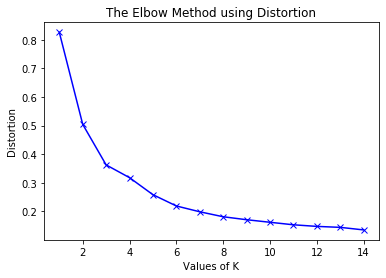

In [8]:
#for clustering use only the data on venue shares (to compare venue distribution) and the population data (to incorporate the density of people living in area)
x = venues.copy()
for i in x.columns:
    if not '_share' in i and i not in ['pop_1000']:
        x.drop(columns=[i], inplace = True)
x = np.nan_to_num(x)        
cluster_dataset = StandardScaler().fit_transform(x)

#Find optimal k
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,15) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k, n_init=25).fit(x) 
    kmeanModel.fit(x)   
      
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / x.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / x.shape[0] 
    mapping2[k] = kmeanModel.inertia_

    
# plot distorption
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()


## Unhash lines below to retrieve distortion data and to check for inertia

# # check distortion
# for key,val in mapping1.items(): 
#     print(str(key)+' : '+str(val))  

# #check inertia
# for key,val in mapping2.items(): 
#     print(str(key)+' : '+str(val))

# # plot distorption
# plt.plot(K, inertias, 'bx-') 
# plt.xlabel('Values of K') 
# plt.ylabel('Inertia') 
# plt.title('The Elbow Method using Inertia') 
# plt.show()

In [9]:
#Set num_clusters to the correct "Elbow point"
num_clusters = 6
k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=25)
k_means.fit(cluster_dataset)
nbh_clusters = k_means.labels_
venues["nbh_clusters"] = nbh_clusters
clusters_df = venues.groupby('nbh_clusters', as_index=False).mean().sort_values('total_venues', ascending=False)
clusters_order = clusters_df['nbh_clusters'].tolist()

In [10]:
clusters_df

,nbh_clusters,ind,offices,shops_daily,shops_other,community,culture,sport_leis,hotels,bars_rest,...,shops_other_share,community_share,culture_share,sport_leis_share,bars_rest_share,hotels_share,leisure_venues,leisure_venues_1000pop,latitude,longitude
2,2,86.000000,1126.000000,164.000000,571.000000,28.000000,270.000000,31.000000,123.000000,481.000000,...,0.198264,0.009722,0.093750,0.010764,0.167014,0.042708,1668.000000,2709.258257,52.373386,4.894064
3,3,133.333333,771.111111,39.555556,144.555556,36.555556,210.111111,27.777778,20.777778,142.888889,...,0.100751,0.033034,0.136148,0.019588,0.082154,0.008435,622.222222,381.824817,52.368514,4.875516
1,1,111.080000,853.400000,21.880000,80.000000,44.000000,292.600000,32.080000,8.920000,79.040000,...,0.054357,0.031575,0.191140,0.022379,0.051941,0.005145,558.520000,270.279138,52.368656,4.901270
4,4,72.647059,813.176471,13.235294,73.529412,29.647059,123.529412,22.882353,8.705882,44.764706,...,0.053102,0.026979,0.088848,0.018004,0.036607,0.006707,316.294118,260.026787,52.351053,4.900791
0,0,165.142857,299.928571,9.000000,38.500000,56.428571,73.285714,18.500000,2.285714,25.928571,...,0.053572,0.087246,0.106710,0.026980,0.034867,0.004080,223.928571,92.610004,52.357948,4.891457
5,5,14.000000,27.000000,0.000000,1.000000,5.000000,9.000000,7.000000,0.000000,3.000000,...,0.015152,0.075758,0.136364,0.106061,0.045455,0.000000,25.000000,187.969925,52.411901,4.962458


## Plot cluster data

In [11]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import rc
import matplotlib.ticker as ticker
import seaborn as sns
import itertools

#### Set cluster labels and circle marker colours

In [18]:
#Labels (and colours) might need to be reordered, depending on cluster outcome
cluster_labels = ['City centre', 'Local centre', 'Urban residential', 'Offices', 'Suburbs and Industry', 'Other', '-', '-', '-', '-']

colours = ["tab:orange", "tab:red", "tab:blue", "tab:grey", "tab:green", "tab:purple", "tab:pink", "tab:brown", "tab:olive", "tab:cyan"]
rainbow = [colors.rgb2hex(i) for i in colours]

#### Shares of venue types per Cluster

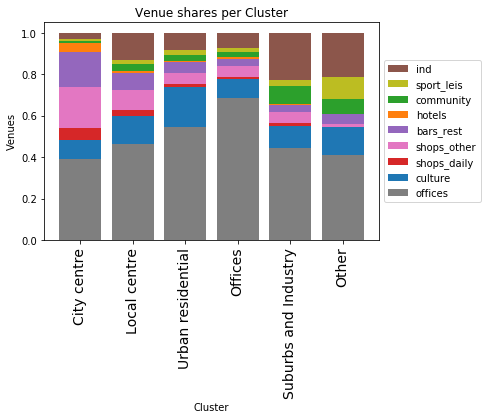

<Figure size 576x432 with 0 Axes>

In [25]:
# Data
cluster_plt_data = clusters_df.copy()
for i in cluster_plt_data.columns:
    if not '_share' in i:
        cluster_plt_data.drop(columns=[i], inplace = True)

cluster_plt_data['total'] = 0
for i in cluster_plt_data.columns:        
    if i not in ['total']:
        cluster_plt_data['total'] = cluster_plt_data['total'] + cluster_plt_data[i]

clusters = clusters_df['nbh_clusters']

ind = np.array(cluster_plt_data['ind_share'])
community = np.array(cluster_plt_data['community_share'])
sport_leis = np.array(cluster_plt_data['sport_leis_share'])
hotels = np.array(cluster_plt_data['hotels_share'])
bars_rest = np.array(cluster_plt_data['bars_rest_share'])
shops_other = np.array(cluster_plt_data['shops_other_share'])
shops_daily = np.array(cluster_plt_data['shops_daily_share'])
culture = np.array(cluster_plt_data['culture_share'])
offices = np.array(cluster_plt_data['offices_share'])

i = [x for x, _ in enumerate(clusters)]
plt.bar(i, ind, width=0.8, label='ind', color='tab:brown', bottom=offices+culture+shops_daily+shops_other+bars_rest+hotels+community+sport_leis)
plt.bar(i, sport_leis, width=0.8, label='sport_leis', color='tab:olive', bottom=offices+culture+shops_daily+shops_other+bars_rest+hotels+community)
plt.bar(i, community, width=0.8, label='community', color='tab:green', bottom=offices+culture+shops_daily+shops_other+bars_rest+hotels)
plt.bar(i, hotels, width=0.8, label='hotels', color='tab:orange', bottom=offices+culture+shops_daily+shops_other+bars_rest)
plt.bar(i, bars_rest, width=0.8, label='bars_rest', color='tab:purple', bottom=offices+culture+shops_daily+shops_other)
plt.bar(i, shops_other, width=0.8, label='shops_other', color='tab:pink', bottom=offices+culture+shops_daily)
plt.bar(i, shops_daily, width=0.8, label='shops_daily', color='tab:red', bottom=offices+culture)
plt.bar(i, culture, width=0.8, label='culture', color='tab:blue', bottom=offices)
plt.bar(i, offices, width=0.8, label='offices', color='tab:grey')

plt.xticks(i, cluster_labels, fontsize=14, rotation=90)
plt.ylabel("Venues")
plt.xlabel("Cluster")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Venue shares per Cluster")
plt.figure(figsize=(8, 6))
plt.tight_layout()
plt.show()

#### Total venues per Cluster

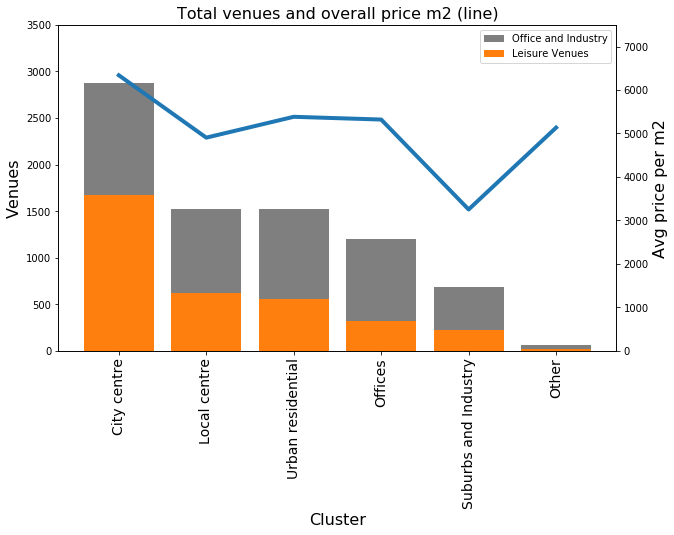

In [26]:
#Data
fig, ax1 = plt.subplots(figsize=(10,6))
total_venues = np.array(clusters_df['total_venues'])
leisure_venues = np.array(clusters_df['leisure_venues'])
price_m2 = np.array(clusters_df['price_m2'])

i = [x for x, _ in enumerate(clusters)]

#bar plot creation
ax1.set_title('Total venues and overall price m2 (line)', fontsize=16)
ax1.set_xlabel('Cluster', fontsize=16)
ax1.set_ylabel('Venues', fontsize=16)
plt.xticks(i, cluster_labels, fontsize=14, rotation=90)

plt.ylim(0,3500)
plt.bar(i, total_venues, width=0.8, label='Office and Industry', color='tab:grey')
plt.bar(i, leisure_venues, width=0.8, label='Leisure Venues', color='tab:orange')

# ax1 = sns.barplot(data=total_venues, color='tab:grey')
# ax1 = sns.barplot(data = leisure_venues, color='tab:orange')
ax1.tick_params(axis='y')

#specify we want to share the same x-axis
ax2 = ax1.twinx()
#line plot creation
ax2.set_ylabel('Avg price per m2', fontsize=16)
ax2 = sns.lineplot(data = price_m2, linewidth=4, sort=False, color='tab:blue')
ax2.tick_params(axis='y')
plt.ylim(0,7500)
ax1.legend(loc='upper right')
#show plot
plt.show()

## Plot clusters on map

In [27]:
# # !conda install -c conda-forge geopy --yes # uncomment this line if you haven't installed yet
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't installed yet
import folium

# import folium # map rendering library

### -- Please use this notebook's link in https://nbviewer.jupyter.org/ to render folium maps (not possible in GitHub) --

#### Map with clusters only

In [46]:
# Amsterdam geo
address = 'Amsterdam, the Netherlands'

geolocator = Nominatim(user_agent="nl_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map
map_ams = folium.Map(location=[latitude, longitude], zoom_start=12)

# price_m2 scale colours
postal_code_stats = pd.DataFrame(venues[['postal_code', 'price_m2', 'pop_1000']])
minima = min(postal_code_stats['price_m2'])
maxima = max(postal_code_stats['price_m2'])
norm = colors.Normalize(vmin=minima, vmax=maxima, clip=True)
colour_mapper = cm.ScalarMappable(norm=norm, cmap=cm.YlOrRd)
colours_price_m2 = []
for i in postal_code_stats['price_m2']:
    colours_price_m2.append(colour_mapper.to_rgba(i))    
colours_price_m2 = [colors.rgb2hex(i) for i in colours_price_m2]    
postal_code_stats['price_colour'] = colours_price_m2

venues = venues.sort_values('leisure_venues', ascending=True)

# #Add average price_m2 heat circlemarkers
# for lat, lng, postal_code, nbh_clusters, price_m2 in zip(venues['latitude'], venues['longitude'], venues['postal_code'], venues['nbh_clusters'], venues['price_m2']):
#     folium.CircleMarker(
#         [lat, lng],
#         radius=20,
#         color=None, #rainbow[clusters_order.index(nbh_clusters)],
#         fill=True,
#         fill_color=colours_price_m2[postal_code_stats['postal_code'].tolist().index(postal_code)],
#         fill_opacity=0.7).add_to(map_ams)

#Add cluster circle markers
for lat, lng, postal_code, nbh_clusters, price_m2 in zip(venues['latitude'], venues['longitude'], venues['postal_code'], venues['nbh_clusters'], venues['price_m2']):
    label = folium.Popup(str(cluster_labels[clusters_order.index(nbh_clusters)]) + ', Postal Code: ' + str(postal_code) + ', ' + str(int(price_m2)) + ' E price m2', parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[clusters_order.index(nbh_clusters)],
        fill=True,
        fill_color=rainbow[clusters_order.index(nbh_clusters)],
        fill_opacity=1).add_to(map_ams)     
    
map_ams

#### Map with clusters and m2 price

In [47]:
# Amsterdam geo
address = 'Amsterdam, the Netherlands'

geolocator = Nominatim(user_agent="nl_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map
map_ams = folium.Map(location=[latitude, longitude], zoom_start=12)

# price_m2 scale colours
postal_code_stats = pd.DataFrame(venues[['postal_code', 'price_m2', 'pop_1000']])
minima = min(postal_code_stats['price_m2'])
maxima = max(postal_code_stats['price_m2'])
norm = colors.Normalize(vmin=minima, vmax=maxima, clip=True)
colour_mapper = cm.ScalarMappable(norm=norm, cmap=cm.YlOrRd)
colours_price_m2 = []
for i in postal_code_stats['price_m2']:
    colours_price_m2.append(colour_mapper.to_rgba(i))    
colours_price_m2 = [colors.rgb2hex(i) for i in colours_price_m2]    
postal_code_stats['price_colour'] = colours_price_m2

venues = venues.sort_values('leisure_venues', ascending=True)

#Add average price_m2 heat circlemarkers
for lat, lng, postal_code, nbh_clusters, price_m2 in zip(venues['latitude'], venues['longitude'], venues['postal_code'], venues['nbh_clusters'], venues['price_m2']):
    folium.CircleMarker(
        [lat, lng],
        radius=20,
        color=None, #rainbow[clusters_order.index(nbh_clusters)],
        fill=True,
        fill_color=colours_price_m2[postal_code_stats['postal_code'].tolist().index(postal_code)],
        fill_opacity=0.7).add_to(map_ams)

#Add cluster circle markers
for lat, lng, postal_code, nbh_clusters, price_m2 in zip(venues['latitude'], venues['longitude'], venues['postal_code'], venues['nbh_clusters'], venues['price_m2']):
    label = folium.Popup(str(cluster_labels[clusters_order.index(nbh_clusters)]) + ', Postal Code: ' + str(postal_code) + ', ' + str(int(price_m2)) + ' E price m2', parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[clusters_order.index(nbh_clusters)],
        fill=True,
        fill_color=rainbow[clusters_order.index(nbh_clusters)],
        fill_opacity=1).add_to(map_ams)    
    
map_ams

In [48]:
your = ["time"]
for time in your:
    print("Thank you!")

Thank you!
